# Predicting House price in King County

# １．データの読込みと確認

CSVデータの読込み
https://www.kaggle.com/harlfoxem/housesalesprediction/data

In [1]:
%matplotlib inline 
#グラフをnotebook内に描画させるための設定
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from datetime import datetime
from mpl_toolkits.mplot3d import Axes3D #3D散布図の描画
import itertools #組み合わせを求めるときに使う
from sklearn.linear_model import LinearRegression

In [2]:
df_data = pd.read_csv("kc_house_data.csv")
df_data["price"] = df_data["price"] / 10**6 #単位を100万ドルにしておく
print(df_data.columns)
display(df_data.head())
display(df_data.tail())
df_data.dtypes

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,0.2219,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,0.5380,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,0.1800,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,0.6040,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,0.5100,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,0.360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,0.400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,0.402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,0.400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,0.325000,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

データ項目のまとめと最初の考察：
Kaggleにあるデータの説明に加え、データを確認した結果として考えられることを記載した。

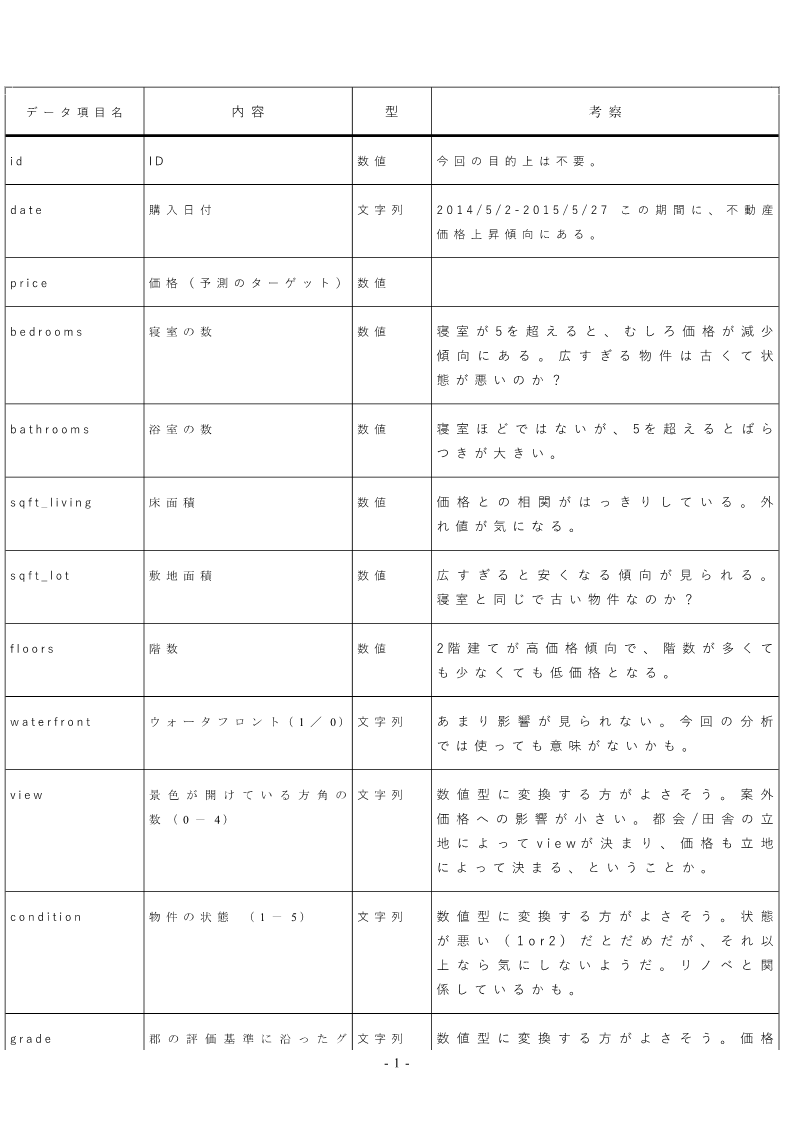
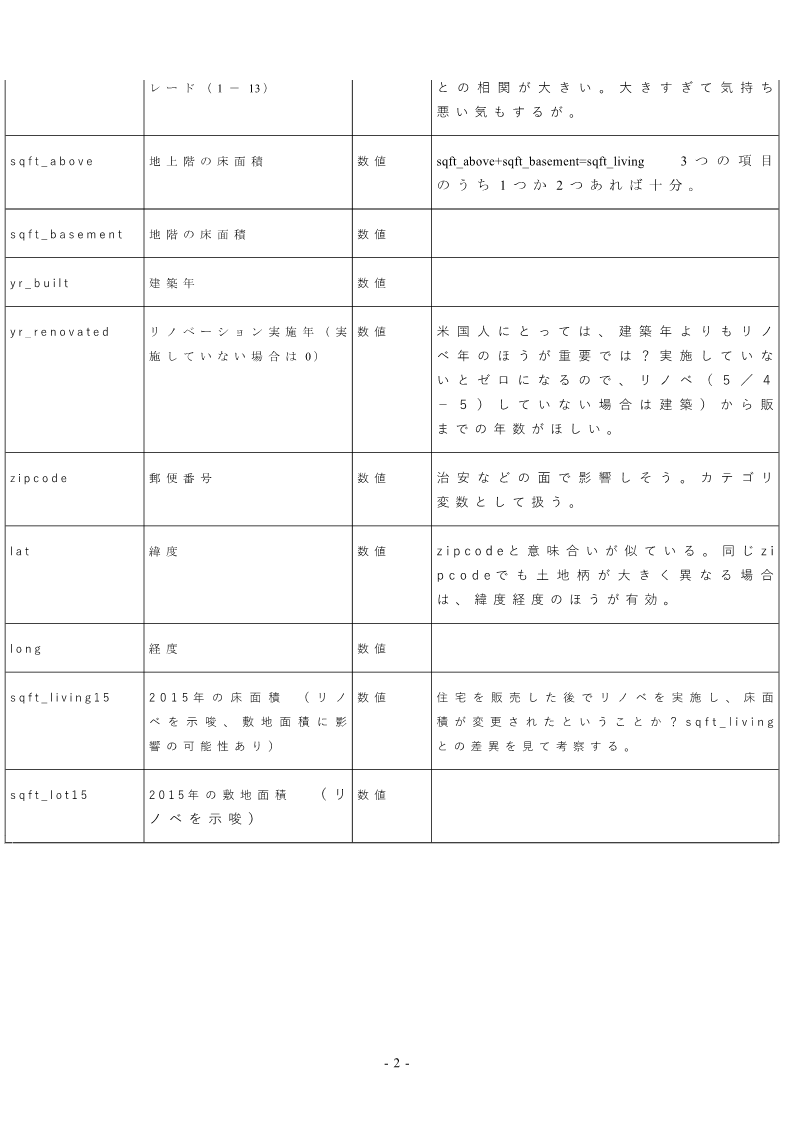

基本的な統計量

In [3]:
df_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,0.540088,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,0.367127,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,0.075000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,0.321950,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,0.450000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,0.645000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


データの相関（ヒートマップ）

In [4]:
#相関行列
df_data.corr().style.background_gradient().format('{:.2f}')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00


各データ項目と価格(price)との相関（散布図）

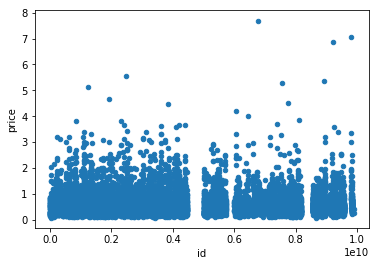

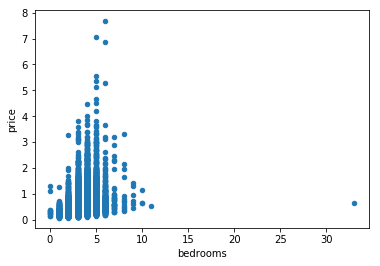

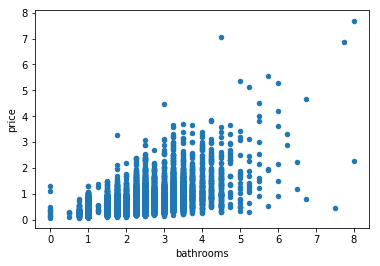

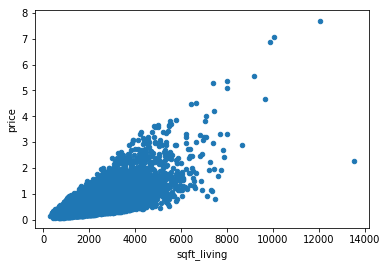

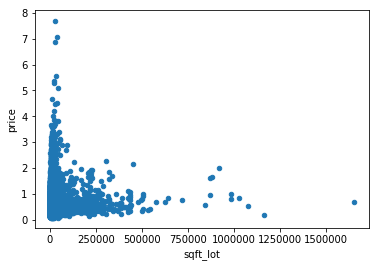

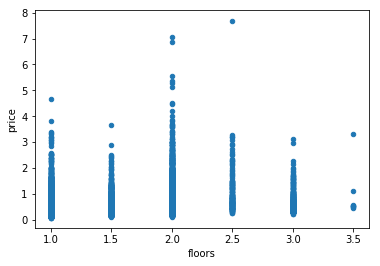

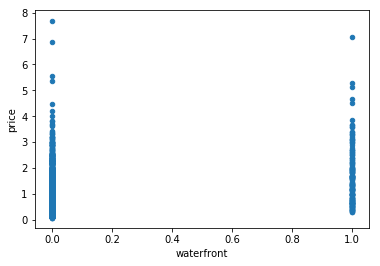

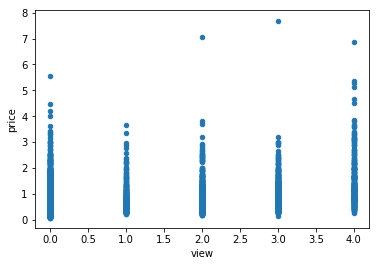

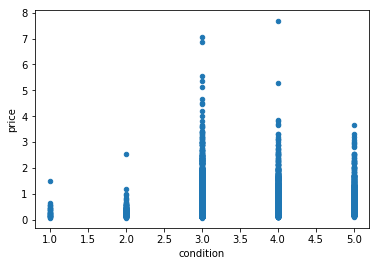

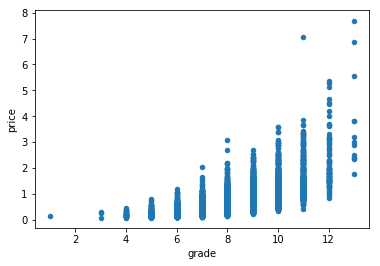

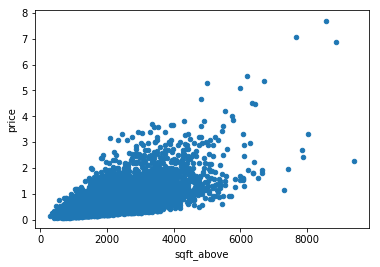

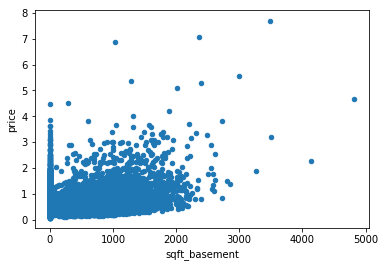

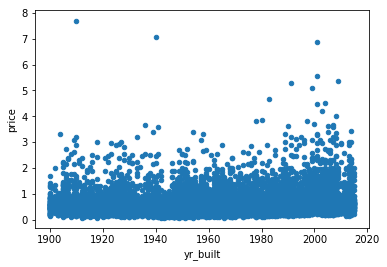

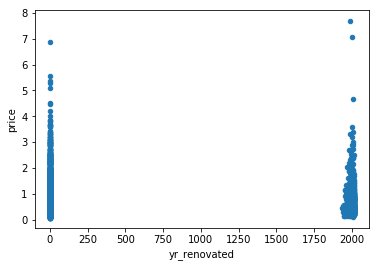

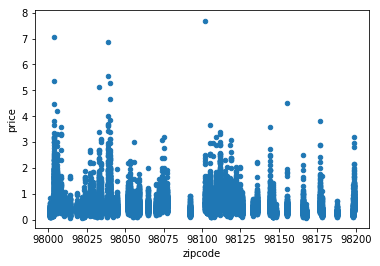

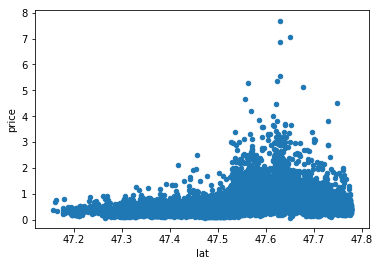

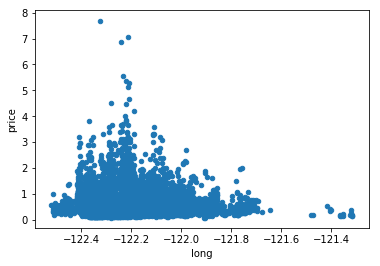

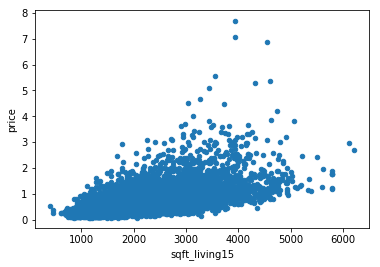

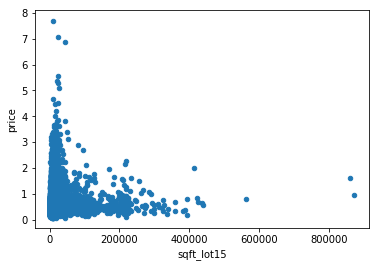

In [5]:
# 項目とpriceの相関を、散布図によって可視化してみる。
for c in df_data.columns:
    if (c != 'price') & (c != 'date'):
        df_data[[c,'price']].plot(kind='scatter',x=c,y='price')

購入後のリノベーションについて

以下の通り、大半の物件で、sqft_living15とsqft_livinに差異がある。sqft_living15は2015年の床面積なので、購入してからリノベしたために差異があると考えると辻褄が合いやすいが、その場合にこれほどデータが取れてるのも不思議。今のところは、不明としておく。仮説としては、この際が大きいほど、価格に対するプレミアムとして働いていることが想定できる。

In [6]:
(df_data['sqft_living15']-df_data['sqft_living']).head(50)

0      160
1     -880
2     1950
3     -600
4      120
5     -660
6      523
7      590
8        0
9      500
10   -1350
11     170
12     350
13       0
14    -450
15    -810
16       0
17      10
18    -140
19      30
20    -220
21    1060
22     -30
23     150
24    -250
25    -680
26    -690
27     460
28       0
29      60
30     260
31     200
32    -870
33     480
34     -40
35    -710
36     500
37    -630
38      70
39       0
40    -100
41   -1810
42      30
43      10
44      60
45    -110
46     238
47     390
48    -280
49     -73
dtype: int64

欠損値の状況

以下の通り、欠損値は存在しない。

In [7]:
df_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# データ前処理および特徴量エンジニアリング

文字列型データの数値型への変換

 view, condition,waterfront は数値型になっていたが、カテゴリ変数とみなし、文字列型に変換する。

In [8]:
#df_data['view'] = df_data['view'].astype(str)
#df_data['condition'] = df_data['condition'].astype(np.str)
#df_data['waterfront'] = df_data['waterfront'].astype(np.str)
#df_data['view'].head()

外れ値の除外

sqft_livingなど、広さを表す項目について外れ値をしらべてみる。

多重共線性の確認

相関係数が0.7以上となった、以下の説明変数について多重共線性を計算する。
sqft_livingとbathrooms,grade,sqft_above,qft_living15
sqft_lotとsqft_lot15
gradeとsqft_living15,sqft_above

箱ひげ図

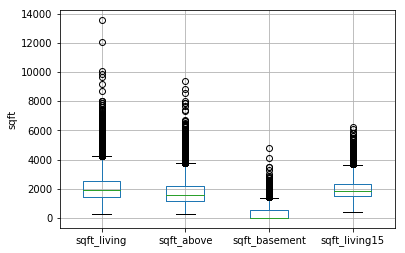

In [9]:
box_list1 = ["sqft_living","sqft_above","sqft_basement","sqft_living15"]
df_data.boxplot(column=box_list1)
plt.title("")
plt.ylabel("sqft")
plt.show()

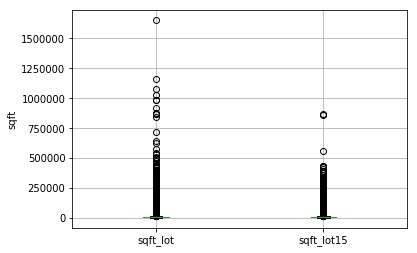

In [10]:
box_list2 = ["sqft_lot","sqft_lot15"]
df_data.boxplot(column=box_list2)
plt.title("")
plt.ylabel("sqft")
plt.show()

sqft_living > 10,000となる物件を除外

In [11]:
df_data = df_data.loc[df_data['sqft_living']<10000]

df_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,4.580114e+09,0.539374,3.370477,2.114102,2078.539704,1.509182e+04,1.494169,0.007497,0.233919,3.409440,7.656270,1787.451550,291.088154,1971.008098,84.229431,98077.943267,47.560040,-122.213902,1986.239658,12758.564692
std,2.876416e+09,0.360998,0.929561,0.767961,911.064691,4.137515e+04,0.539875,0.086259,0.765617,0.650764,1.174386,824.260996,441.077500,29.371143,401.286361,53.505857,0.138569,0.140828,684.905497,27270.278116
min,1.000102e+06,0.075000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,0.321613,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470925,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,0.450000,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230500,1840.000000,7620.000000
75%,7.308900e+09,0.645000,4.000000,2.500000,2550.000000,1.068475e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,6.885000,33.000000,7.750000,9890.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


正規化　- lat(緯度), long(経度)を正規化する。

In [12]:
# 正規化
df_data["lat"] = (df_data["lat"] - df_data["lat"].min()) / (df_data["lat"].max() - df_data["lat"].min())
df_data["long"] = (df_data["long"] - df_data["long"].min()) / (df_data["long"].max() - df_data["long"].min())
df_data["long"].head()

0    0.217608
1    0.166113
2    0.237542
3    0.104651
4    0.393688
Name: long, dtype: float64

建築年、リノベ年→経過年数

yr_built,yr_renovatedついて、建築およびリノベから販売時までの年数を求め、それぞれyr_since_built,yr_since_renovatedとすることによって回帰分析に適した数値とする。yr_built＝0の場合には、yr_since_builtをyr_since_renovatedにコピーする。

In [13]:
#　日付の形式を確認
print(df_data['date'].head())
print(df_data['yr_built'].head())
print(df_data['yr_renovated'].head())

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object
0    1955
1    1951
2    1933
3    1965
4    1987
Name: yr_built, dtype: int64
0       0
1    1991
2       0
3       0
4       0
Name: yr_renovated, dtype: int64


In [14]:
#　建築およびリノベから販売時までの年数を計算
yr_sales = df_data['date'].str[0:4].astype(np.int)
#print("sales year:",yr_sales)

df_data['yr_since_built'] = yr_sales - df_data['yr_built']
#print(df_data['yr_since_built'])

df_data['yr_since_renovated'] = df_data['yr_renovated'].where(df_data['yr_renovated']!=0, df_data['yr_built'])
#print(df_data['yr_since_renovated'])

df_data['yr_since_renovated'] = yr_sales - df_data['yr_since_renovated']
df_data['yr_since_renovated'].head()


0    59
1    23
2    82
3    49
4    28
Name: yr_since_renovated, dtype: int64

購入期間（約1年間）における住宅価格上昇に対する考慮

米国の住宅物価指数（S&P/シラー住宅価格指数をみると2014年5月2日~2015年5月27日は、概ね対前年同月比5-12%上昇（上昇率は 12%⇒5%の低下傾向） している。したがって、販売時期によって最大5%程度価格が影響を受けているはず。販売時期による影響を適切に学習させるため2014年5月2日を起点として、それ以降の経過日数をdate2として機会学習に活用する。
https://lets-gold.net/chart_gallery/chart_usa_macro_case-shiller.php

In [15]:
from datetime import datetime

df_data['date2'] = pd.to_datetime(df_data['date']) 

#datetime(2014,5,2)

df_data['date2'] -= datetime(2014,5,2)
df_data['date2'] = df_data['date2'].astype('timedelta64[D]').astype(int)
         
df_data['date2'].head()



0    164
1    221
2    299
3    221
4    292
Name: date2, dtype: int32

In [16]:
#to_datetimeを使わない型変換の方法（Kohsakuさんに教えてもらったのでメモとして記録）
#import pandas as pd
#import numpy as np
#from datetime import datetime

#df_data['date2'] = df_data['date'].map(lambda date: datetime.strptime(date[0:8], '%Y%m%d'))
#df_data['date2']

VIFを計算する

In [17]:
#VIFの計算
from sklearn.linear_model import LinearRegression
df_data_tmp = df_data.drop('date',axis=1)
for cname in df_data_tmp.columns:  
    y = df_data_tmp[cname]
    X = df_data_tmp.drop(cname, axis=1)
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X, y)
    rsquared = regr.score(X,y)
    if rsquared == 1:
        print(cname,X.columns[(regr.coef_> 0.5) | (regr.coef_ < -0.5)])

sqft_living Index(['sqft_above', 'sqft_basement'], dtype='object')
sqft_above Index(['sqft_living', 'sqft_basement'], dtype='object')
sqft_basement Index(['sqft_living', 'sqft_above'], dtype='object')


zipcode - onehot coding

zipcode(カテゴリカル変数)を回帰モデルに適用するため、onehot coding処理をおこなう。

In [18]:
df_data['zipcode_str'] = df_data['zipcode'].astype(str).map(lambda x:'zip_'+x)
df_data2 = pd.concat([df_data,pd.get_dummies(df_data['zipcode_str'])],axis=1)
df_data2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,7129300520,20141013T000000,0.2219,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,20141209T000000,0.5380,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,20150225T000000,0.1800,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,20141209T000000,0.6040,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,20150218T000000,0.5100,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


不要データの削除

分析に不要な項目、異なるラベルの項目を設けたので不要になった項目、
すなわち、id, date, yr_built, yr_renovated, zipocode,zipcode_stringは削除する。

また、VIFの結果を踏まえ、
sqft_livingとsqft_above,sqft_basementでは多重共線性が生じているものとして
sqft_above,sqft_basementを除去する。

In [19]:
#df_data3 = df_data2.drop(['id', 'date','sqft_above', 'sqft_basement', 'yr_built', \
#                          'yr_renovated', 'zipcode', 'zipcode_str', \
#                         'bathrooms','sqft_above','sqft_living15','sqft_lot','sqft_lot15'], axis=1)
df_data3 = df_data2.drop(['id', 'date','sqft_above', 'sqft_basement', 'yr_built', \
                          'yr_renovated', 'zipcode', 'zipcode_str', \
                         'sqft_above'], axis=1)
df_data3.columns


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_since_built', 'yr_since_renovated',
       'date2', 'zip_98001', 'zip_98002', 'zip_98003', 'zip_98004',
       'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010',
       'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023',
       'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030',
       'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034', 'zip_98038',
       'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045', 'zip_98052',
       'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059',
       'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075',
       'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103', 'zip_98105',
       'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112',
       'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118', 'zi

# モデルの学習

線形重回帰分析のトライアル



In [20]:
#データを再確認
df_data3.dtypes

price                 float64
bedrooms                int64
bathrooms             float64
sqft_living             int64
sqft_lot                int64
floors                float64
waterfront              int64
view                    int64
condition               int64
grade                   int64
lat                   float64
long                  float64
sqft_living15           int64
sqft_lot15              int64
yr_since_built          int64
yr_since_renovated      int64
date2                   int32
zip_98001               uint8
zip_98002               uint8
zip_98003               uint8
zip_98004               uint8
zip_98005               uint8
zip_98006               uint8
zip_98007               uint8
zip_98008               uint8
zip_98010               uint8
zip_98011               uint8
zip_98014               uint8
zip_98019               uint8
zip_98022               uint8
                       ...   
zip_98092               uint8
zip_98102               uint8
zip_98103 

In [21]:
X = df_data3.drop(['price'],axis=1)
y = df_data3['price']
regr = LinearRegression(fit_intercept=True).fit(X,y)

# モデルの評価

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

regr = LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("MSE=%s"%round(mse,3) )
print("RMSE=%s"%round(np.sqrt(mse), 3) )
print("MAE=%s"%round(mae,3) )


MSE=0.028
RMSE=0.167
MAE=0.097
